In [6]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9695, 0.7768, 0.8581],
        [0.8555, 0.4246, 0.7452],
        [0.0852, 0.4347, 0.5143],
        [0.8146, 0.1325, 0.0712],
        [0.6015, 0.8534, 0.4023]])


In [7]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import matplotlib.pyplot as plt

In [8]:
file = "../data/raw/01/0_01_0.wav"

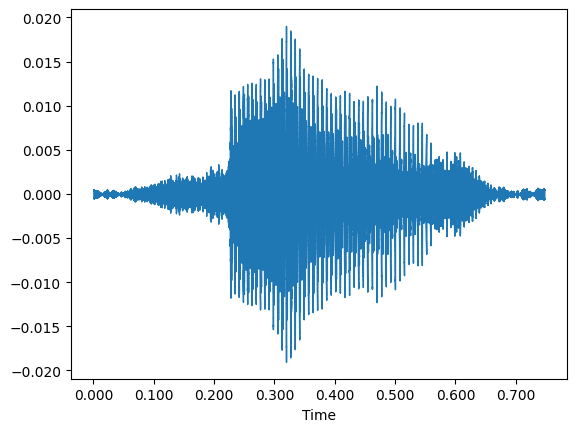

In [9]:
data, sample_rate = librosa.load(file)
    
dsp.waveshow(data,sr=sample_rate)
plt.show()
Audio(data=data,rate=sample_rate)

In [10]:
data.shape, data

((16481,),
 array([0.00031352, 0.00047915, 0.00043088, ..., 0.00051201, 0.00050631,
        0.00054931], dtype=float32))

In [11]:
import numpy as np

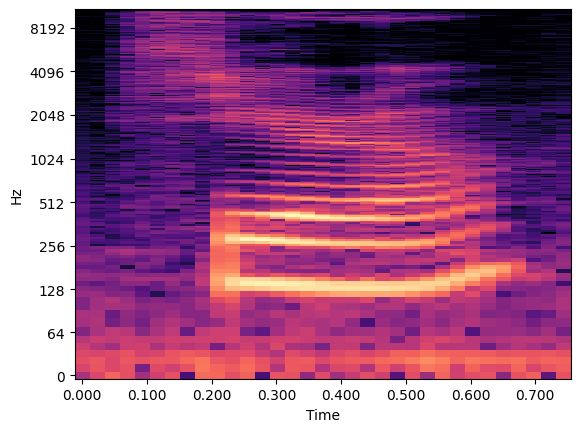

In [12]:
D = librosa.stft(data)
# Converting frequency to decible
S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
# Plot the transformed data
librosa.display.specshow(S_db,x_axis='time',y_axis='log')

In [13]:
extracted_features = librosa.feature.mfcc(y=data,
                                          sr=sample_rate,
                                          n_mfcc=40
                                        )

In [14]:
extracted_features.shape, extracted_features

((40, 33),
 array([[-7.8918188e+02, -7.9293994e+02, -7.2494135e+02, ...,
         -7.6323114e+02, -7.5442511e+02, -7.5053064e+02],
        [ 1.0016368e+02,  8.5640739e+01,  4.3138824e+01, ...,
          1.0649577e+02,  1.0408878e+02,  1.0154913e+02],
        [ 2.5564987e+01,  2.7395523e+01,  1.4492516e+01, ...,
          1.5109684e+01,  2.1622555e+01,  1.8813267e+01],
        ...,
        [ 3.0872648e+00,  1.1043032e+00,  1.9798406e+00, ...,
          7.0167623e+00,  2.9918392e+00, -4.9950576e-01],
        [ 1.7173238e+00,  3.5338769e+00,  6.8296003e-01, ...,
          3.7956276e+00,  3.2028456e+00,  8.7231350e-01],
        [ 1.4040476e+00, -1.7291427e-02, -2.3629954e+00, ...,
          4.4449716e+00,  7.2862425e+00,  3.4716051e+00]], dtype=float32))

In [15]:
# Scale the extracted features
extracted_features = np.mean(extracted_features.T,axis=0)

In [16]:
extracted_features.shape, extracted_features

((40,),
 array([-6.17908264e+02,  1.01589775e+02,  9.84757328e+00,  2.64035873e+01,
         2.57842388e+01,  1.75538325e+00,  7.38078737e+00, -1.25201607e+01,
         8.84089756e+00, -2.51341611e-01, -5.33537054e+00,  5.46051621e-01,
         9.14501858e+00, -5.21918726e+00, -6.96687261e-03,  5.06073189e+00,
         5.05750954e-01,  5.31599379e+00, -1.21082764e+01,  1.25373220e+00,
        -2.94577527e+00,  9.65367258e-01, -2.30222797e+00,  9.21841443e-01,
        -4.76720905e+00,  2.81222773e+00, -7.90083838e+00,  3.36312151e+00,
        -6.18309975e-01, -1.51315236e+00,  4.60176229e-01,  1.56120968e+00,
        -3.26152730e+00,  3.75201797e+00, -1.91523361e+00, -1.82707858e+00,
        -2.77643394e+00,  2.12764359e+00,  2.83703208e-01, -3.62987697e-01],
       dtype=float32))

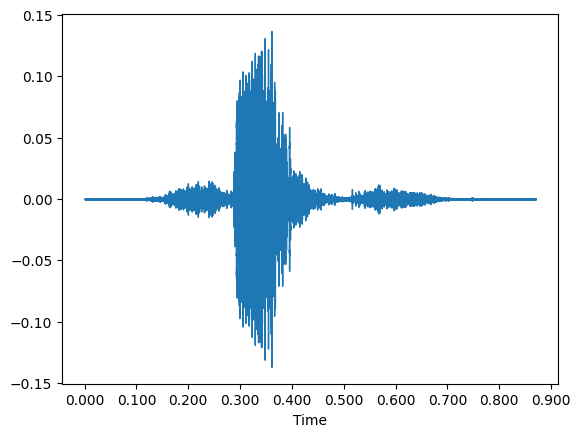

In [22]:
file = "../data/test/beltran/6_beltran_0.wav"

data, sample_rate = librosa.load(file, sr=16000)
    
dsp.waveshow(data,sr=sample_rate)
plt.show()
Audio(data=data,rate=sample_rate)

In [18]:
import librosa

In [25]:
extracted_features = librosa.feature.mfcc(
    y=data,
    sr=sample_rate,
    n_mfcc=13,
    n_fft=512,
    hop_length=160,
    fmin=20,
    fmax=8000
)

In [26]:
extracted_features.shape

(13, 88)

In [36]:
import os
from pathlib import Path
ROOT_DIR = Path('/home/beltran/projects/AudioML-pipe/')

data_path = ROOT_DIR / "data/raw/"

filepaths = [
    Path(os.path.join(root, file))
    for root, dirs, files in os.walk(str(data_path)) if not dirs # take only leaf nodes
    for file in files
]

In [38]:
sizes = []

for file in filepaths:
    data, sample_rate = librosa.load(file, sr=16000)
    extracted_features = librosa.feature.mfcc(
        y=data,
        sr=sample_rate,
        n_mfcc=13,
        n_fft=512,
        hop_length=160,
        fmin=20,
        fmax=8000
    )
    sizes.append(extracted_features.shape[1])
    
sizes = np.array(sizes)

In [39]:
sizes = np.array(sizes)
print(sizes.max())

101
